## Dataset from article "Large, chemically diverse dataset of log P measurements for benchmarking studies"

https://www.sciencedirect.com/science/article/pii/S0928098712004198?via%3Dihub

### Summary

1. There are 706 molecules with experimental logP and pH

2. There is only 1 duplicated molecule with 2 measurments of logP with different pH (CC(C)CCn1c2c(nc1NCCO)n(c(=O)n(c2=O)C)C)

3. There is no Temperature column

4. Probably these molecules intersect with ochem database

## Converting from .txt file to DataFrame

In [37]:
import pandas as pd
import os
import seaborn as sns

In [38]:
DATASET_PATH = '../data/raw'
DATASET_FILENAME = 'DiverseDataset.txt'

In [39]:
col_names = 'ID ZINC(2010) Supplier SMILES logPexp pHofanalysis'.split(' ')

In [40]:
logp_data = pd.DataFrame(columns = col_names)

In [41]:
logp_data.head()

,ID,ZINC(2010),Supplier,SMILES,logPexp,pHofanalysis


In [42]:
with open(os.path.join(DATASET_PATH,DATASET_FILENAME)) as f:
    for i, line in enumerate(f):
        if i==0:
            continue
        
        data = line.rstrip().split(' ')
        if data[2] == 'Validated' :
            
            new_row = data[:2]+[' '.join(data[3:-3])]+data[-3:]
            new_row = dict([(col_names[i], new_row[i]) for i in range(len(col_names))])
            logp_data = logp_data.append(new_row,ignore_index=True)

In [43]:
logp_data[['ID', 'logPexp', 'pHofanalysis']] = logp_data[['ID', 'logPexp', 'pHofanalysis']].apply(pd.to_numeric)

In [44]:
logp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            707 non-null    int64  
 1   ZINC(2010)    707 non-null    object 
 2   Supplier      707 non-null    object 
 3   SMILES        707 non-null    object 
 4   logPexp       707 non-null    float64
 5   pHofanalysis  707 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 33.3+ KB


In [45]:
logp_data.head()

,ID,ZINC(2010),Supplier,SMILES,logPexp,pHofanalysis
0,1,ZINC00036522,Specs,Cc1cc2c(cc1C)NC(=O)C[C@H]2c3ccccc3OC,4.17,5.0
1,3,ZINC00185379,ChemBridge,COc1ccc2c(c1)O[C@@](CC2=O)(C(F)(F)F)O,2.79,5.0
2,4,ZINC12402487,ChemBridge,CC1(O[C@H]([C@H](O1)C(=O)N)C(=O)N)C(C)(C)C,1.60,6.5
3,5,ZINC00055459,Specs,CCOc1cc(cc(c1OCC)OCC)c2nnc(o2)c3ccco3,3.96,10.5
4,6,ZINC00056871,Enamine,CN(C)c1ccc(cc1)C(=C)c2ccc(cc2)N(C)C,5.30,7.3


In [46]:
logp_data['smiles'] = logp_data['SMILES']
logp_data['logP'] = logp_data['logPexp']
logp_data['pH'] = logp_data['pHofanalysis']

PROCESSED_PATH = '../data/1_filtering/'

logp_data[['smiles','logP','pH']].to_csv(os.path.join(PROCESSED_PATH,'Diverse1KDataset.csv'))

## Getting info about dataset

In [47]:
import pandas as pd
import os
import seaborn as sns

In [48]:
DATASET_PATH = '../data/1_filtering/'
DATASET_FILENAME = 'Diverse1KDataset.csv'

In [49]:
logp_data = pd.read_csv(os.path.join(DATASET_PATH,DATASET_FILENAME), index_col=0)

In [50]:
VALUE_COLUMN = 'logP'
PH_COLUMN = 'pH'
SMILES_COLUMN = 'smiles'

n = logp_data.shape[0]

In [51]:
# check NA values
num_of_na_value = logp_data[VALUE_COLUMN].isna().sum()
frac_of_na_value = int(100.0*(num_of_na_value / n))
print("# of NA values logP = " + str(num_of_na_value) + ", " + str(frac_of_na_value) + "%")
logp_data[logp_data[VALUE_COLUMN].isna()]

# of NA values logP = 0, 0%


,smiles,logP,pH


In [52]:
logp_data[[VALUE_COLUMN, PH_COLUMN]].describe()

,logP,pH
count,707.000000,707.000000
mean,4.188713,6.438614
std,1.179046,2.292337
min,0.300000,2.000000
25%,3.460000,5.000000
50%,4.330000,5.000000
75%,4.980000,7.300000
max,6.960000,10.500000


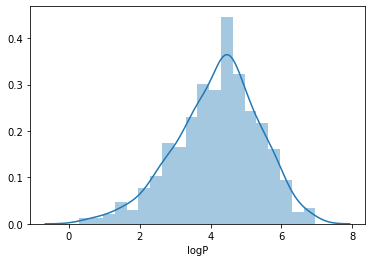

In [53]:
# logP value distribution
sns.distplot(logp_data[VALUE_COLUMN])

In [54]:
num_of_na_ph = logp_data[PH_COLUMN].isna().sum()
frac_of_na_ph = int(100.0*(num_of_na_ph / n))
print("# of NA values pH = " + str(num_of_na_ph) + ", " + str(frac_of_na_ph) + "%")
ph_df = logp_data[logp_data[PH_COLUMN].notna()][PH_COLUMN].astype(float)
ph_df.describe()

# of NA values pH = 0, 0%


count    707.000000
mean       6.438614
std        2.292337
min        2.000000
25%        5.000000
50%        5.000000
75%        7.300000
max       10.500000
Name: pH, dtype: float64

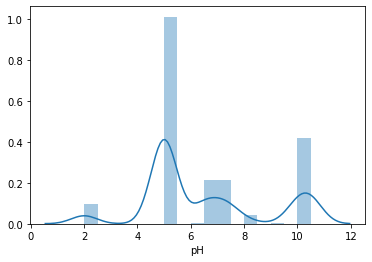

In [55]:
# pH parameter disctribution
sns.distplot(ph_df)

In [56]:
# duplicated molecules
logp_data[SMILES_COLUMN].unique().size

706

In [57]:
logp_data.groupby(SMILES_COLUMN).count().index[(logp_data.groupby(SMILES_COLUMN).count()[PH_COLUMN]==2).values]

Index(['CC(C)CCn1c2c(nc1NCCO)n(c(=O)n(c2=O)C)C'], dtype='object', name='smiles')

In [58]:
logp_data[logp_data[SMILES_COLUMN]=='CC(C)CCn1c2c(nc1NCCO)n(c(=O)n(c2=O)C)C']

,smiles,logP,pH
300,CC(C)CCn1c2c(nc1NCCO)n(c(=O)n(c2=O)C)C,2.93,7.3
320,CC(C)CCn1c2c(nc1NCCO)n(c(=O)n(c2=O)C)C,5.36,5.0


In [59]:
PROCESSED_PATH = '../data/1_filtering/Diverse1KDataset.csv'

logp_data.to_csv(PROCESSED_PATH)

In [60]:
pd.read_csv(PROCESSED_PATH, index_col=0)

,smiles,logP,pH
0,Cc1cc2c(cc1C)NC(=O)C[C@H]2c3ccccc3OC,4.17,5.0
1,COc1ccc2c(c1)O[C@@](CC2=O)(C(F)(F)F)O,2.79,5.0
2,CC1(O[C@H]([C@H](O1)C(=O)N)C(=O)N)C(C)(C)C,1.60,6.5
3,CCOc1cc(cc(c1OCC)OCC)c2nnc(o2)c3ccco3,3.96,10.5
4,CN(C)c1ccc(cc1)C(=C)c2ccc(cc2)N(C)C,5.30,7.3
...,...,...,...
702,OCC#CC(c2ccc(F)cc2)(O)c1ccc(F)cc1,3.61,5.0
703,CC/N=C\1/N(C(=O)/C(=C/c2cn(c3c2cccc3)CC(=O)Nc4...,5.80,10.0
704,c1ccc2c(c1)nc(n2C[C@@H](CO)O)SCCSc3nc4ccccc4n3...,3.29,10.5
705,CCOC(=O)c1ccc(cc1)C#N,1.87,5.0
